# Classification of severity for new traffic events

## Business problem

Every person that needs to move from a place to another one, develop a mental route to follow in order to reach the target place, however there is a lot of possible choices to take, and many considerations to keep in mind. 
It could seems like trivial choose the shortest route, however there are other issues to consider, such as how long this route can take, road conditions, hour, traffic and not less important, is this a safe route?. All this issues are take into account whether for people that want to move but also for people in charge of the roads maintenance, emergency teams, police and government entities. 
Every year the govermentd entities assign a budget for their different issues in charge, including the emergency services. For these reasons is relvant knowing more about the behaviour of accident on the roads, in order to define when could be useful having more emergency teams and equipments.
Therefore, we will study the car accident severity data wich will provide us information about accidents reported and their relevant variables that could make us understand better what conditions are more likely to trigger an accident, as well as when the events could happen, giving information to government entities about when and how much resources should to assign for emergency services.

## Data understanding

### Downloading data

In [60]:
!wget https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

Once the data has been downloaded it is possible to use python libraries that allow to work easier with large datasets. Therefore, these libraries will be added along this notebook. The fist one is the pandas library, that allows to load csv files in a dataframe easily operable, then a few statistics and basic information of the dataset is useful to understand better what data will be used.

In [130]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns

In [61]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

C:\Users\andre\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [62]:
df.shape

(194673, 38)

In [125]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'SEVERITYDESC',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDTTM',
       'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING',
       'HITPARKEDCAR', 'Alley', 'Block', 'Intersection', 'Blowing Sand/Dirt',
       'W_clear', 'Fog/Smog/Smoke', 'W_other', 'Overcast', 'Partly Cloudy',
       'Raining', 'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing',
       'R_Dry', 'R_Ice', 'R_Oil', 'R_Other', 'Sand/Mud/Dirt', 'R_Snow/Slush',
       'R_Standing Water', 'R_Wet', 'Dark - No Street Lights',
       'Dark - Street Lights Off', 'Dark - Street Lights On',
       'Dark - Unknown Lighting', 'Dawn', 'Daylight', 'Dusk', 'Light_Other',
       'high_traffic_hours'],
      dtype='object')

In [126]:
df.dtypes

SEVERITYCODE                         int64
X                                  float64
Y                                  float64
OBJECTID                             int64
INCKEY                               int64
SEVERITYDESC                        object
PERSONCOUNT                          int64
PEDCOUNT                             int64
PEDCYLCOUNT                          int64
VEHCOUNT                             int64
INCDTTM                     datetime64[ns]
INATTENTIONIND                       int32
UNDERINFL                            int32
PEDROWNOTGRNT                        int32
SPEEDING                             int32
HITPARKEDCAR                         int32
Alley                                uint8
Block                                uint8
Intersection                         uint8
Blowing Sand/Dirt                    uint8
W_clear                              uint8
Fog/Smog/Smoke                       uint8
W_other                              uint8
Overcast   

In [8]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


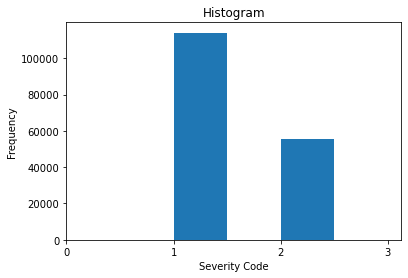

In [157]:
bins = (0.5,1,1.5,2,2.5,3)
plt.pyplot.hist(df["SEVERITYCODE"], bins)
plt.pyplot.xlabel('Severity Code')
plt.pyplot.ylabel('Frequency')
plt.pyplot.title('Histogram')
plt.pyplot.xticks([0,1,2,3])
plt.pyplot.show()

The image above reveals a target that shows an unbalanced dataframe.

In [65]:
df["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [66]:
df["HITPARKEDCAR"].value_counts()

N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64

## Data preparation

The columns that show descriptions will not be useful to make predictions, it is more suitable work with numerical and correctly prepare categorical variables 

In [67]:
df.drop(["REPORTNO","STATUS","INTKEY","LOCATION","EXCEPTRSNCODE","EXCEPTRSNDESC","COLLISIONTYPE","INCDATE","JUNCTIONTYPE","SDOT_COLCODE","SDOT_COLDESC","SDOTCOLNUM","ST_COLCODE","ST_COLDESC","SEGLANEKEY","CROSSWALKKEY","SEVERITYCODE.1","COLDETKEY"],axis=1, inplace= True)
df["INATTENTIONIND"].replace(regex = [np.nan,"Y"],value=["0","1"], inplace = True)
df["INATTENTIONIND"] = df["INATTENTIONIND"].astype("int")
df["PEDROWNOTGRNT"].replace(regex = [np.nan,"Y"],value=["0","1"], inplace = True)
df["PEDROWNOTGRNT"] = df["PEDROWNOTGRNT"].astype("int")
df["SPEEDING"].replace(regex = [np.nan,"Y"],value=["0","1"], inplace = True)
df["SPEEDING"] = df["SPEEDING"].astype("int")
df["HITPARKEDCAR"].replace(regex = ["N","Y"],value=["0","1"], inplace = True)
df["HITPARKEDCAR"] = df["HITPARKEDCAR"].astype("int")

In [68]:
df["HITPARKEDCAR"].value_counts()

0    187457
1      7216
Name: HITPARKEDCAR, dtype: int64

In [69]:
df["UNDERINFL"].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [70]:
df["UNDERINFL"].replace("N", 0, inplace = True)
df["UNDERINFL"].replace("Y", 1, inplace = True)
df.replace(np.nan, 0, inplace = True)
df["UNDERINFL"] = df["UNDERINFL"].astype("int")
df["UNDERINFL"].value_counts()

0    185552
1      9121
Name: UNDERINFL, dtype: int64

### Turning categorical variables into numerical variables

In [71]:
df["ADDRTYPE"].replace(0, np.nan, inplace = True)
df["ADDRTYPE"].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [72]:
df.replace("Unknown", np.nan, inplace = True)
df["WEATHER"].replace(0, np.nan, inplace = True)
df["ROADCOND"].replace(0, np.nan, inplace = True)
df["LIGHTCOND"].replace(0, np.nan, inplace = True)
df.dropna(subset=["WEATHER","ROADCOND","LIGHTCOND","X","Y","ADDRTYPE"], axis=0, inplace=True)

In [73]:
df_t = df # Auxiliar dataframe before dummies and scaling

In [74]:
ADDRTYPE_type = pd.get_dummies(df["ADDRTYPE"])
ADDRTYPE_type.head(10)

,Alley,Block,Intersection
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,1,0
9,0,0,1


In [75]:
df = pd.concat([df, ADDRTYPE_type], axis=1)
df.drop("ADDRTYPE", axis = 1, inplace=True)

In [76]:
WEATHER_type = pd.get_dummies(df["WEATHER"])
WEATHER_type = WEATHER_type.rename(columns = {'Clear':'W_clear','Other':'W_other'})

In [77]:
ROADCOND_type = pd.get_dummies(df["ROADCOND"])
ROADCOND_type = ROADCOND_type.rename(columns = {'Dry':'R_Dry','Ice':'R_Ice','Oil':'R_Oil','Other':'R_Other','Snow/Slush':'R_Snow/Slush','Standing Water':'R_Standing Water','Wet':'R_Wet'})

In [78]:
LIGHTCOND_type = pd.get_dummies(df["LIGHTCOND"])
LIGHTCOND_type = LIGHTCOND_type.rename(columns = {'Other':'Light_Other'})

## Joining new numerical variables with the original dataframe

In [79]:
df = pd.concat([df, WEATHER_type,ROADCOND_type,LIGHTCOND_type], axis=1)
df.drop("WEATHER", axis = 1, inplace=True)
df.drop("ROADCOND", axis = 1, inplace=True)
df.drop("LIGHTCOND", axis = 1, inplace=True)

## Getting the hour from date attribute

In [80]:
import datetime
df['INCDTTM'] = pd.to_datetime(df.INCDTTM)
df['HOUR'] = df['INCDTTM'].dt.hour
df['HOUR'] = df['HOUR'].astype("int")
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,R_Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Light_Other,HOUR
0,2,-122.323148,47.703140,1,1307,Injury Collision,2,0,0,2,...,1,0,0,0,0,0,1,0,0,14
1,1,-122.347294,47.647172,2,52200,Property Damage Only Collision,2,0,0,2,...,1,0,0,1,0,0,0,0,0,18
2,1,-122.334540,47.607871,3,26700,Property Damage Only Collision,4,0,0,3,...,0,0,0,0,0,0,1,0,0,10
3,1,-122.334803,47.604803,4,1144,Property Damage Only Collision,3,0,0,3,...,0,0,0,0,0,0,1,0,0,9
4,2,-122.306426,47.545739,5,17700,Injury Collision,2,0,0,2,...,1,0,0,0,0,0,1,0,0,8


In [81]:
df['high_traffic_hours'] = df['HOUR'].apply(lambda x: 1 if ((x>7 and x<10) or (x>16 and x<19)) else 0)
df.drop("HOUR", axis = 1, inplace=True)

In [82]:
df['SEVERITYCODE'].value_counts()

1    114074
2     55707
Name: SEVERITYCODE, dtype: int64

### Balancing the data

(array([55707.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 55707.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

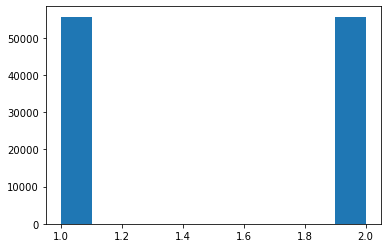

In [83]:
shuffled_df = df.sample(frac=1,random_state=4)
code2_df = shuffled_df.loc[shuffled_df['SEVERITYCODE'] == 2]
code1_df = shuffled_df.loc[shuffled_df['SEVERITYCODE'] == 1].sample(n=55707,random_state=42)
df_b = pd.concat([code1_df, code2_df])
plt.pyplot.hist(df_b["SEVERITYCODE"])

In [104]:
df_b.corr()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,...,R_Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Light_Other,high_traffic_hours
SEVERITYCODE,1.000000,-0.016041,0.016288,0.027942,0.027472,0.118568,0.215321,0.190000,-0.079157,0.030044,...,0.012018,-0.020472,-0.011217,-0.030839,0.001132,-0.000375,0.032544,0.006485,-0.002884,0.033403
X,-0.016041,1.000000,-0.999959,-0.016573,-0.019127,-0.020048,-0.016884,-0.018325,-0.030663,-0.007262,...,0.033715,0.020941,0.012563,0.013413,-0.001060,0.003421,-0.019583,-0.006345,0.037922,-0.003023
Y,0.016288,-0.999959,1.000000,0.016411,0.018950,0.019936,0.017018,0.018624,0.030769,0.007380,...,-0.033764,-0.021029,-0.012624,-0.013485,0.001021,-0.003554,0.019670,0.006462,-0.037944,0.003160
OBJECTID,0.027942,-0.016573,0.016411,1.000000,0.949034,-0.063461,0.033257,0.046185,-0.023303,0.109592,...,-0.000120,0.005768,-0.002096,-0.005355,0.012406,0.010281,0.004116,-0.008144,0.007358,0.081406
INCKEY,0.027472,-0.019127,0.018950,0.949034,1.000000,-0.062865,0.033468,0.042743,-0.022473,0.106307,...,-0.003696,0.006128,-0.004341,-0.007296,0.017268,0.011793,0.004690,-0.005609,0.009507,0.078636
PERSONCOUNT,0.118568,-0.020048,0.019936,-0.063461,-0.062865,1.000000,-0.045492,-0.063255,0.418112,0.064423,...,-0.000184,-0.016196,-0.006128,-0.000608,-0.004668,-0.027420,0.009693,0.006346,-0.006776,-0.005652
PEDCOUNT,0.215321,-0.016884,0.017018,0.033257,0.033468,-0.045492,1.000000,-0.035915,-0.351714,-0.015627,...,0.023467,0.002910,0.001151,0.031224,0.007246,0.009681,-0.033538,0.002599,-0.002777,0.015207
PEDCYLCOUNT,0.190000,-0.018325,0.018624,0.046185,0.042743,-0.063255,-0.035915,1.000000,-0.341187,-0.006190,...,-0.050620,-0.004479,-0.003380,-0.048952,0.003710,0.010028,0.042639,0.006676,-0.003943,0.055215
VEHCOUNT,-0.079157,-0.030663,0.030769,-0.023303,-0.022473,0.418112,-0.351714,-0.341187,1.000000,0.059315,...,-0.011486,-0.009572,-0.005094,-0.037573,-0.008580,-0.015468,0.042957,-0.002231,-0.000020,-0.001069
INATTENTIONIND,0.030044,-0.007262,0.007380,0.109592,0.106307,0.064423,-0.015627,-0.006190,0.059315,1.000000,...,-0.032052,-0.009787,-0.002286,-0.059234,-0.003616,-0.002104,0.062099,-0.008223,-0.005809,0.030224


## Modeling

In order to predict a classification K-nearest, decision tree and SVM models will be applied looking for find the best one. 
Keeping in mind get metrics that allow understand which model can be better, the dataset must to be splitted into trainset and testset.

In [84]:
import itertools
from sklearn import preprocessing
X = df_b[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT','INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR', 'Alley', 'Block', 'Intersection', 'Blowing Sand/Dirt','W_clear', 'Fog/Smog/Smoke', 'W_other', 'Overcast', 'Partly Cloudy','Raining', 'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing','R_Dry', 'R_Ice', 'R_Oil', 'R_Other', 'Sand/Mud/Dirt', 'R_Snow/Slush','R_Standing Water', 'R_Wet', 'Dark - No Street Lights','Dark - Street Lights Off', 'Dark - Street Lights On','Dark - Unknown Lighting', 'Dawn', 'Daylight', 'Dusk', 'Light_Other','high_traffic_hours']].values
y = df_b['SEVERITYCODE'].values
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (77989, 39) (77989,)
Test set: (33425, 39) (33425,)


In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [123]:
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.58534031, 0.59243082, 0.61498878, 0.61100972, 0.62046372,
       0.62022438, 0.62471204, 0.62441286, 0.63419596, 0.63033657,
       0.63383695, 0.63302917, 0.63012715, 0.62638743, 0.6271653 ,
       0.63114435, 0.62934929, 0.63090501, 0.62928945, 0.63186238,
       0.63356769, 0.63566193, 0.63524308, 0.63569185, 0.64035901,
       0.64089753, 0.64290202, 0.63976066, 0.64248317])

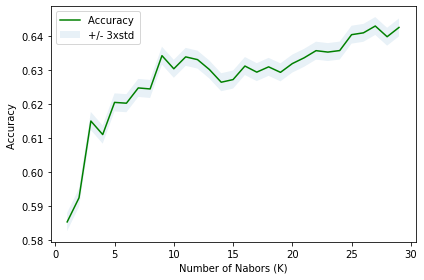

In [158]:
import matplotlib.pyplot as plt
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [87]:
k = 27
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=27)

In [103]:
yhat = neigh.predict(X_test)
yhat[0:20]

array([2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [89]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.6535280616497199
Test set Accuracy:  0.642902019446522


### Decision tree

In [90]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [91]:
Tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [92]:
predTree = Tree.predict(X_test)

In [102]:
print (predTree [0:20])
print (y_test [0:20])

[2 1 1 2 1 2 1 1 2 1 2 2 1 1 1 1 1 1 1 1]
[1 2 2 2 1 2 1 1 2 1 1 1 2 2 2 1 2 2 2 1]


In [95]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Decision tree accuracy: ", metrics.accuracy_score(y_test, predTree))

Desicion tree accuracy:  0.6413462976813762


### SVM

In [97]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [98]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 2, 1, 2, 1], dtype=int64)

In [99]:
from sklearn.metrics import classification_report
import itertools

In [100]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.6474121904394509

## Results and discussion

There are 5 codes to classify an accident:

-3. Fatality.
-2b. Serious injury.
-2. Injury.
-1. Promp damage.
-0. Unknown.

However, the dataset just present 2 of theses codes, showing a no balanced dataset, with a ratio of 2:1, in other words every 2 cases of promp damage there is one of injury. Also, by means a sample, a map shows the downtown as the zone with more accidentes.

In [128]:
from folium import plugins

limit = 1000
df_l = df_t.iloc[0:limit, :]

latitude = 47.619
longitude = -122.33

seattle = folium.Map(location = [latitude, longitude], zoom_start = 11)
 
accidents = plugins.MarkerCluster().add_to(seattle)
 
for lat, lng, label, in zip(df_l.Y, df_l.X, df_l.SEVERITYCODE):
    label = str(label)
   
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(accidents)
 
# display map
seattle


In order to compare among different models the accuracy to predict the severity for a new event, three models were applied, k-nearest, decision tree and support vector machine, there was not a big difference among their results, their accuracy was 0.64. 
It is reasonable, if we consider that the correlation among variables is too weak, the highest correlation respect to the target was 0.215321 corresponding to the pedestrian involved in the accident, and the lowest value was -0.000375 and correspond to  dawn weather condition.
Finally, the emergency service can expect be ready to attend an emergency that involves injury at the downtown and the surrounding areas to green lake, so it could help to stablish new emergency points to treat injuries and check the routes to hospitals and medical centres. 

## Conclusions

Thanks to computer tools is possible to processing thousands of entries in a few minuts, this allows people be more creative and analitic. However, this kind of computer tools work well if the data is correctly prepared, and this task can take much time because this implies understand very well the problem to solve and what mean the data to do it. 

Furthermore, this is a iterative process, perhaps make the process once again or more times if is requiered can help to understand or highlight insights in data that can improve the models.

As the data juts have 2 codes regarding to the 5 classificator codes, it is not possible to predict a code different of these codes.

Leonardo Vela
Applied Data Science Capstone, final assignment.
22/09/2020